In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read imputed csv file
df = pd.read_csv('csv_files/comp2_working.csv', index_col=0)
df.head()

,X1,X12_abs,X13_abs,X14_abs,X15_abs,X16_abs,X17_abs
1,20000,3913,3102,689,0,0,0
2,120000,2682,1725,2682,3272,3455,3261
3,90000,29239,14027,13559,14331,14948,15549
4,50000,46990,48233,49291,28314,28959,29547
5,50000,8617,5670,35835,20940,19146,19131


### Fixing the Skew of the Features ###

In [3]:
# examine skew of each column
df.skew()

X1         0.992867
X12_abs    2.667725
X13_abs    2.708496
X14_abs    3.093013
X15_abs    2.828133
X16_abs    2.881514
X17_abs    2.872948
dtype: float64

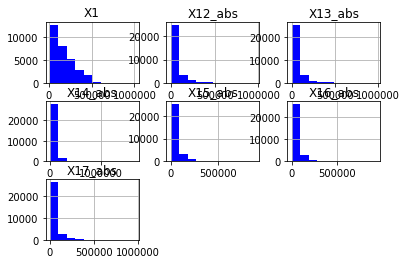

In [4]:
# examine distribution of each column
for col in df.columns:
    df.hist(color='blue')
    break
plt.show()

In [5]:
df['X1'] = np.cbrt(np.sqrt(df['X1']))
df['X1'].skew()

-0.23517265168949286

In [6]:
df['X12_abs'] = np.sqrt(np.cbrt(df['X12_abs']))
df['X12_abs'].skew()

-0.8521799708525496

In [7]:
df['X13_abs'] = np.sqrt(np.cbrt(df['X13_abs']))
df['X13_abs'].skew()

-0.8697602233266669

In [8]:
df['X14_abs'] = np.sqrt(np.cbrt(df['X14_abs']))
df['X14_abs'].skew()

-0.8753822430998222

In [9]:
df['X15_abs'] = np.sqrt(np.cbrt(df['X15_abs']))
df['X15_abs'].skew()

-0.8722930395277099

In [10]:
df['X16_abs'] = np.cbrt(np.sqrt(abs(df['X16_abs'])))
df['X16_abs'].skew()

-0.8370839996278904

In [11]:
df['X17_abs'] = np.cbrt(np.sqrt(df['X17_abs']))
df['X17_abs'].skew()

-0.7810086895360645

### Verifying that Skew was Fixed ###

In [12]:
# check skew of columns 
# should be relatively normal (bell-shaped) or as close as possible 
df.skew()

X1        -0.235173
X12_abs   -0.852180
X13_abs   -0.869760
X14_abs   -0.875382
X15_abs   -0.872293
X16_abs   -0.837084
X17_abs   -0.781009
dtype: float64

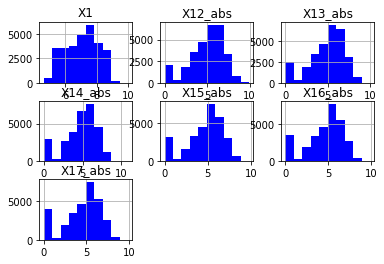

In [13]:
# visualize distribution of variables 
for col in df.columns:
    df.hist(color='blue')
    break
plt.show()

### Outlier Handling ###

In [14]:
for col in df.columns:
    u_bound = df[col].mean() + 3* df[col].std()
    df[col][df[col] > u_bound] = u_bound

In [15]:
# check
pd.Series(df[col][df[col]] > u_bound).value_counts()

False    30000
Name: X17_abs, dtype: int64

In [16]:
for col in df.columns:
    l_bound = df[col].mean() - 3* df[col].std()
    df[col][df[col] < l_bound] = l_bound

In [17]:
# check
pd.Series(df[col][df[col]] < l_bound).value_counts()

False    30000
Name: X17_abs, dtype: int64

### Verifying that Outliers were Fixed ###

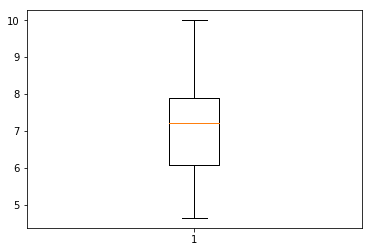

In [18]:
plt.boxplot(df['X1'], whis='range')
plt.show()

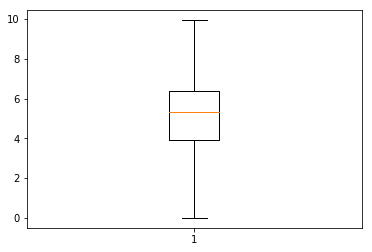

In [19]:
plt.boxplot(df['X12_abs'], whis='range')
plt.show()

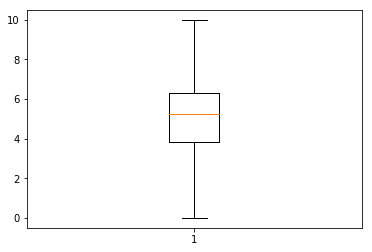

In [20]:
plt.boxplot(df['X13_abs'], whis='range')
plt.show()

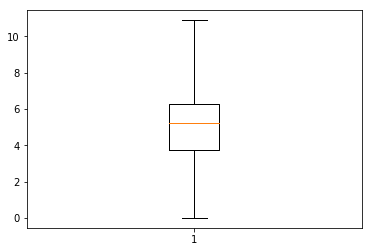

In [21]:
plt.boxplot(df['X14_abs'], whis='range')
plt.show()

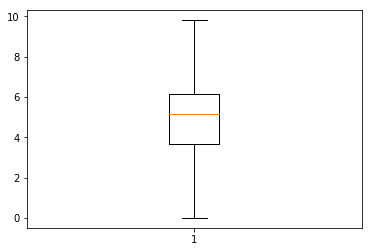

In [22]:
plt.boxplot(df['X15_abs'], whis='range')
plt.show()

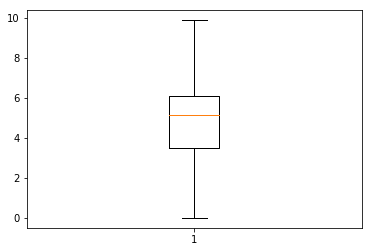

In [23]:
plt.boxplot(df['X16_abs'], whis='range')
plt.show()

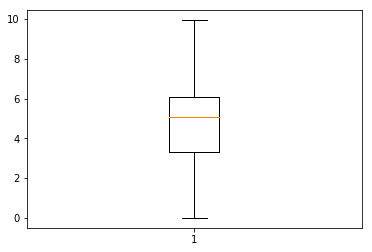

In [24]:
plt.boxplot(df['X17_abs'], whis='range')
plt.show()

### Scaling the Data ###

In [25]:
# import the preprocessing package from sklearn 
from sklearn import preprocessing
# define column names
names = df.columns

# create scaler variable 
scaler = preprocessing.StandardScaler()

# fit and scale data 
dfstandard = scaler.fit_transform(df)
dfstandard = pd.DataFrame(dfstandard, columns=names)

## Verifying that the Data was Scaled ###

In [26]:
# check if data was scaled correctly
# mean and stdev should be equal to or almost equal to 0 and 1 respectively 
dfstandard.describe()

,X1,X12_abs,X13_abs,X14_abs,X15_abs,X16_abs,X17_abs
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,-1.044024e-15,-1.063446e-16,7.626492e-17,-3.789561e-17,-5.258016e-17,-2.178998e-17,2.160050e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-2.277309e+00,-2.515004e+00,-2.366661e+00,-2.280506e+00,-2.211690e+00,-2.134718e+00,-2.019201e+00
25%,-9.378709e-01,-5.429758e-01,-5.242382e-01,-5.040768e-01,-4.930736e-01,-5.071967e-01,-5.234551e-01
50%,1.279088e-01,1.599807e-01,1.789996e-01,1.904228e-01,2.160076e-01,2.428477e-01,2.626159e-01
75%,7.631813e-01,6.972307e-01,6.931351e-01,6.858096e-01,6.809038e-01,6.829543e-01,7.017711e-01
max,2.748667e+00,2.493538e+00,2.457974e+00,2.877805e+00,2.396223e+00,2.446070e+00,2.445836e+00


### Combining the DataFrames ###

In [28]:
# read in the y and cat csv files 
dfy = pd.read_csv('../csv_files/comp2_y.csv', index_col=0)
dfcat = pd.read_csv('../csv_files/comp2_cat.csv', index_col=0)

In [29]:
# concat working df with dfcat
df = pd.concat([dfstandard, dfcat], axis=1, join='inner')
df.head()

,X1,X12_abs,X13_abs,X14_abs,X15_abs,X16_abs,X17_abs,X2,X3,X4,...,X16_sign,X16_monthlydif,X17_sign,X17_monthlydif,X18_binary,X19_binary,X20_binary,X21_binary,X22_binary,X23_binary
1,-0.043526,-0.636826,-0.691325,-0.514247,-0.401965,-0.331057,-0.288536,2,2,1,...,0,2,0,1,0,1,0,0,0,0
2,-0.351920,0.281748,0.009073,0.033419,0.103162,0.167664,0.226085,2,2,2,...,1,2,1,1,0,1,1,1,0,1
3,-0.937871,0.511870,0.552072,0.588772,0.381358,0.435939,0.479649,2,2,2,...,1,2,1,1,1,1,1,1,1,1
4,-0.937871,-0.233509,-0.323821,0.440290,0.254197,0.264630,0.305020,2,2,1,...,1,2,1,1,1,1,1,1,1,1
5,-0.937871,0.675122,0.635061,0.664312,0.222876,0.274409,0.322760,1,2,1,...,1,2,1,1,1,1,1,1,1,1


In [30]:
# just making sure that nothing funky happened
df.tail()

,X1,X12_abs,X13_abs,X14_abs,X15_abs,X16_abs,X17_abs,X2,X3,X4,...,X16_sign,X16_monthlydif,X17_sign,X17_monthlydif,X18_binary,X19_binary,X20_binary,X21_binary,X22_binary,X23_binary
29995,0.656726,1.301952,1.310341,1.368004,0.920832,0.468587,0.236340,1,2,2,...,1,2,1,1,1,1,0,1,0,1
29996,0.206076,-0.777173,-0.675053,-0.433943,-0.070369,-0.204492,-2.019201,1,3,1,...,1,2,1,1,1,1,1,1,1,1
29997,-1.402505,-0.545591,-0.494798,-0.506002,0.252979,0.293726,0.309574,1,3,2,...,1,2,0,1,1,1,1,1,0,0
29998,-0.473979,-0.783775,0.798071,0.805541,0.664916,0.080401,0.698935,1,2,2,...,1,2,1,1,0,0,1,1,1,1
29999,-0.937871,0.521868,0.558811,0.593343,0.493900,0.484873,0.220369,1,3,1,...,1,2,1,1,1,1,1,1,1,1


In [31]:
# concat df with target feature
df = pd.concat([df, dfy],axis=1,join='inner')
df.head()

,X1,X12_abs,X13_abs,X14_abs,X15_abs,X16_abs,X17_abs,X2,X3,X4,...,X16_monthlydif,X17_sign,X17_monthlydif,X18_binary,X19_binary,X20_binary,X21_binary,X22_binary,X23_binary,Y
1,-0.043526,-0.636826,-0.691325,-0.514247,-0.401965,-0.331057,-0.288536,2,2,1,...,2,0,1,0,1,0,0,0,0,1
2,-0.351920,0.281748,0.009073,0.033419,0.103162,0.167664,0.226085,2,2,2,...,2,1,1,0,1,1,1,0,1,1
3,-0.937871,0.511870,0.552072,0.588772,0.381358,0.435939,0.479649,2,2,2,...,2,1,1,1,1,1,1,1,1,0
4,-0.937871,-0.233509,-0.323821,0.440290,0.254197,0.264630,0.305020,2,2,1,...,2,1,1,1,1,1,1,1,1,0
5,-0.937871,0.675122,0.635061,0.664312,0.222876,0.274409,0.322760,1,2,1,...,2,1,1,1,1,1,1,1,1,0


In [32]:
# get a list of the column names 
# see that they are out of order - will need to fix this later 
df.columns

Index(['X1', 'X12_abs', 'X13_abs', 'X14_abs', 'X15_abs', 'X16_abs', 'X17_abs',
       'X2', 'X3', 'X4', 'X5_Age_Bins', 'X6_Payment_Bins', 'X7_Payment_Bins',
       'X8_Payment_Bins', 'X9_Payment_Bins', 'X10_Payment_Bins',
       'X11_Payment_Bins', 'X12_sign', 'X12_monthlydif', 'X13_sign',
       'X13_monthlydif', 'X14_sign', 'X14_monthlydif', 'X15_sign',
       'X15_monthlydif', 'X16_sign', 'X16_monthlydif', 'X17_sign',
       'X17_monthlydif', 'X18_binary', 'X19_binary', 'X20_binary',
       'X21_binary', 'X22_binary', 'X23_binary', 'Y'],
      dtype='object')

In [33]:
# reorder the columns appropriately 
df = df[['X1','X2','X3','X4','X5_Age_Bins','X6_Payment_Bins', 'X7_Payment_Bins','X8_Payment_Bins','X9_Payment_Bins',
         'X10_Payment_Bins','X11_Payment_Bins','X12_abs','X12_sign','X12_monthlydif','X13_abs','X13_sign','X13_monthlydif',
        'X14_abs','X14_sign','X14_monthlydif','X15_abs','X15_sign','X15_monthlydif','X16_abs','X16_sign','X16_monthlydif',
        'X17_abs','X17_sign','X17_monthlydif','X18_binary','X19_binary','X20_binary','X21_binary','X22_binary','X23_binary','Y']]
df.head()

,X1,X2,X3,X4,X5_Age_Bins,X6_Payment_Bins,X7_Payment_Bins,X8_Payment_Bins,X9_Payment_Bins,X10_Payment_Bins,...,X17_abs,X17_sign,X17_monthlydif,X18_binary,X19_binary,X20_binary,X21_binary,X22_binary,X23_binary,Y
1,-0.043526,2,2,1,1,2,2,1,1,2,...,-0.288536,0,1,0,1,0,0,0,0,1
2,-0.351920,2,2,2,1,1,2,2,2,2,...,0.226085,1,1,0,1,1,1,0,1,1
3,-0.937871,2,2,2,2,2,2,2,2,2,...,0.479649,1,1,1,1,1,1,1,1,0
4,-0.937871,2,2,1,2,2,2,2,2,2,...,0.305020,1,1,1,1,1,1,1,1,0
5,-0.937871,1,2,1,3,1,2,1,2,2,...,0.322760,1,1,1,1,1,1,1,1,0


In [34]:
# checking that columns were reordered properly 
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5_Age_Bins', 'X6_Payment_Bins',
       'X7_Payment_Bins', 'X8_Payment_Bins', 'X9_Payment_Bins',
       'X10_Payment_Bins', 'X11_Payment_Bins', 'X12_abs', 'X12_sign',
       'X12_monthlydif', 'X13_abs', 'X13_sign', 'X13_monthlydif', 'X14_abs',
       'X14_sign', 'X14_monthlydif', 'X15_abs', 'X15_sign', 'X15_monthlydif',
       'X16_abs', 'X16_sign', 'X16_monthlydif', 'X17_abs', 'X17_sign',
       'X17_monthlydif', 'X18_binary', 'X19_binary', 'X20_binary',
       'X21_binary', 'X22_binary', 'X23_binary', 'Y'],
      dtype='object')

In [35]:
# export the dataframe 
df.to_csv('csv_files/p2_comp2_final_use.csv')